<a href="https://colab.research.google.com/github/NTsering/Sentiment-Analysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras import optimizers

In [0]:
# from google.colab import drive
# # Path to dataset: https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv 
# drive.mount('/content/drive')

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# import random
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Conv1D, Dropout, Flatten, MaxPooling1D, AveragePooling1D, Activation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def load_dataset(path):
  dataset = pd.read_csv(path,sep = '\t', header = 0)
  dataset = dataset.loc[:, 'Phrase':'Sentiment']
  return dataset

In [0]:
def visualize_dataset(dataset):
  dataset.hist(bins=20, figsize=(20,5), layout=(1,3))
  plt.show()

In [0]:
def preprocess_dataset(documents):
  porter = PorterStemmer()
  lancaster = LancasterStemmer()

  wordnet_lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  punctuations = '-\'?:!.,;\"()'

  remove_stopwords = True
  useStemming = False
  useLemma = True
  removePuncs = True

  for l in range(len(documents)):
    label = documents[l][1]
    tempReview = []
    for w in documents[l][0].split(' '):
      newWord = w
      if remove_stopwords and (w in stop_words):
        continue
      if removePuncs and (w in punctuations):
        continue
      if useStemming:
        newWord = porter.stem(newWord)
      if useLemma:
        newWord = wordnet_lemmatizer.lemmatize(newWord)
      tempReview.append(newWord)

      documents[l] = (' '.join(tempReview), label)
  return documents

In [0]:
# path = '/content/drive/My Drive/NLP/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset-master/train.tsv'
path = "https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv"
dataset = load_dataset(path)

In [13]:
dataset.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


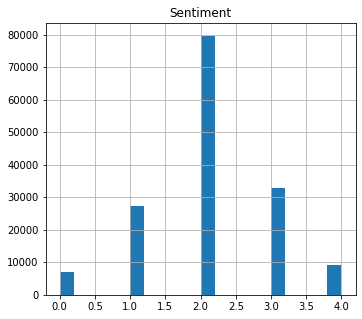

In [14]:
visualize_dataset(dataset)
documents = dataset.values.tolist()
documents = preprocess_dataset(documents)

In [0]:
# print('Phrase: ',documents[0][0],'\nSentiment: ',documents[0][1])

In [0]:
# print(documents[200:210])

In [0]:
len(documents)

156060

In [0]:
all_data = pd.DataFrame(documents, columns=['Phrase', 'Sentiment'])
x_train, x_test, y_train, y_test = train_test_split(all_data['Phrase'], all_data['Sentiment'], train_size = 0.7, shuffle = True, random_state = 2003, stratify = all_data['Sentiment'])

In [0]:
vectorizer = TfidfVectorizer(stop_words = 'english', ngram_range= (1,1), max_features = 2500)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
# all_data = pd.DataFrame(documents, columns=['Phrase', 'Sentiment'])

In [18]:
print( x_train.shape, x_test.shape)

(109242, 2500) (46818, 2500)


In [0]:
x_train_np = x_train.toarray()
y_train_np = to_categorical(y_train)
x_test_np = x_test.toarray()
y_test_np = to_categorical(y_test)

In [0]:
x_train_final = np.expand_dims(x_train_np, axis=2)
x_test_final = np.expand_dims(x_test_np, axis=2)

In [0]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(109242, 2500) (109242,) (46818, 2500) (46818,)


In [0]:
def model_CNN():
  model = Sequential()

  model.add(Conv1D(filters = 64, kernel_size=1, activation='relu', input_shape=(x_train_np.shape[1],1)))
  model.add(Conv1D(filters = 128, kernel_size=1))
  # Batch normalization layer added here
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(256))
  # Batch normalization layer added here
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation='softmax'))
  return model

In [21]:
model = model_CNN()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2500, 64)          128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2500, 128)         8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2500, 128)         512       
_________________________________________________________________
activation_1 (Activation)    (None, 2500, 128)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1250, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1250, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160000)           

In [28]:
from keras import backend as K

def recall(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1score(y_true, y_pred):

  prec = precision(y_true, y_pred)
  rec = recall(y_true, y_pred)
  f1score = (2 * (prec * rec)/(rec + prec))
  return f1score


epochs = 30
# rms = optimizers.RMSprop(lr=0.001, rho=0.9)
# nadam = optimizers.Nadam(lr = 0.01, beta_1=0.9, beta_2=0.999)
adamax = optimizers.Adamax(lr = 0.01, beta_1=0.9, beta_2=0.999, decay = 0.001)
# adam = optimizers.Adam(lr = 0.01, beta_1=0.9, beta_2=0.999, amsgrad=True, decay = 0.001 )
# model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['acc',  precision, recall])
model.compile(optimizer=adamax, loss='categorical_crossentropy', metrics=['acc', recall, precision, f1score])

In [0]:
# history = model.fit(x_train_final, y_train_np, validation_data=(x_test_final, y_test_np), epochs= epochs, batch_size = 128)
history = model.fit(x_train_final, y_train_np, validation_data=( x_test_final, y_test_np), epochs= epochs, batch_size = 128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 109242 samples, validate on 46818 samples
Epoch 1/30





109242/109242 [==============================] - 160s 1ms/step - loss: 1.1496 - acc: 0.5524 - recall: 0.3935 - precision: 0.6352 - f1score: 0.4850 - val_loss: 2.2678 - val_acc: 0.2787 - val_recall: 0.2328 - val_precision: 0.3337 - val_f1score: 0.2740
Epoch 2/30
109242/109242 [==============================] - 146s 1ms/step - loss: 1.0254 - acc: 0.5957 - recall: 0.4676 - precision: 0.6675 - f1score: 0.5495 - val_loss: 2.8656 - val_acc: 0.2702 - val_recall: 0.2673 - val_precision: 0.2718 - val_f1score: 0.2695
Epoch 3/30
109242/109242 [==============================] - 146s 1ms/step - loss: 0.9822 - acc: 0.6148 - recall: 0.5016 - precision: 0.6784 - f1score: 0.5764 - val_loss: 1.8970 - val_acc: 0.2972 - val_recall: 0.2444 - val_precision: 0.3523 - val_f1score: 0.2883
Epoch 4/30
109242/109242 [==============================] - 1

In [0]:
print(history.history)

{'val_loss': [2.267806084398743, 2.865570843196841, 1.8969696860600833, 3.155162042359264, 2.109394493119934, 2.7568102473455705, 2.125530395265819, 1.7775342397735856, 2.2787675449740115, 1.8634195692684146, 1.6833381490739174, 2.990962225785142, 1.768093163065055, 2.212499353437413, 1.010346645796394, 1.126109307490296, 1.0564065675946506, 1.2443296406859696, 1.3270430640095938, 1.03918687002464, 1.3277697534500863, 1.4833087838288328, 1.0120291668803787, 1.1848453284583051, 1.4787734948084974, 1.3191458605412227, 1.0056629046747465, 1.1673145814129153, 1.1146594073304026, 1.018066762092963], 'val_acc': [0.2786535093200126, 0.27017386474714383, 0.297172027848716, 0.28155837496997627, 0.2903156905323668, 0.32088085780628944, 0.3042846768298771, 0.3945277457464571, 0.30684779357984504, 0.5711905677838309, 0.35845187750084295, 0.33632363623503136, 0.40749284466041485, 0.5629885940999079, 0.6205305651697895, 0.6047460378512369, 0.6115382972284671, 0.5936391986319305, 0.5665769576135188, 

In [0]:
print('Avg Train Accuracy:\t', (np.mean(history.history['acc'])))
print('Avg Train Loss:\t', np.mean(history.history['loss']))
print('Avg Train Precison: \t',  np.mean(history.history['precision']))
print('Avg Train Recall: \t',  np.mean(history.history['recall']))
print('Avg Train F1 Score: \t',  np.mean(history.history['f1score']))

Avg Accuracy:	 0.6662446678011791
Avg Loss:	 0.8638065918222911
Avg Precison: 	 0.7087642036777914
Avg Recall: 	 0.594942726544774
Avg F1 Score: 	 0.6457946204119143


In [0]:
print('Best Train Accuracy:\t', (np.max(history.history['acc'])))
print('Best Train Loss:\t', np.min(history.history['loss']))
print('Best Train Precison: \t',  np.max(history.history['precision']))
print('Best Train Recall: \t',  np.max(history.history['recall']))
print('Best Train F1 Score: \t',  np.max(history.history['f1score']))

Best Train Accuracy:	 0.692673147687175
Best Train Loss:	 0.7982157111108981
Best Train Precison: 	 0.7261463257726547
Best Train Recall: 	 0.6416305084092416
Best Train F1 Score: 	 0.6810150453122942


In [0]:
matrices = model.evaluate(x = x_test_final, y = y_test_np)

46818/46818 [==============================] - 23s 492us/step


In [0]:
print('Test Loss:\t', matrices[0], '\nTest Accuracy:\t', matrices[1], '\nTest Precision:\t', matrices[2], 
      '\nTest Recall:\t', matrices[3], '\nTest F-Measure:\t', matrices[4])

Test Loss:	 1.018066761789962 
Test Accuracy:	 0.6237771797172028 
Test Precision:	 0.5823187662864711 
Test Recall:	 0.6464783394829141 
Test F-Measure:	 0.6121659892001264


In [0]:
model.save('11043771dconv_cal.h5')

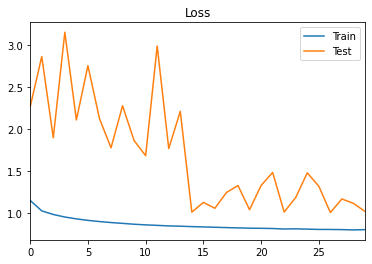

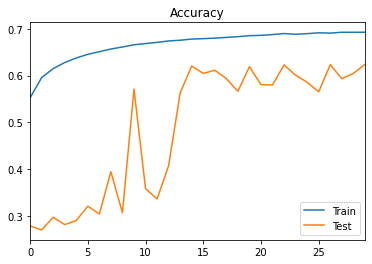

In [0]:
history_df = pd.DataFrame(history.history)
ax = history_df[['loss', 'val_loss']].plot(title = "Loss")
ax.legend(["Train", "Test"]);
ax = history_df[['acc', 'val_acc']].plot(title = "Accuracy")
ax.legend(['Train', 'Test'])

In [0]:
history_df = pd.DataFrame(history.history)
ax = history_df[['f1score', 'val_f1score', 'recall', 'val_recall', 'precision', 'val_precision']].plot(title = "Metrics")
ax.legend(["Train F1 Score", "Test F1 Score", 'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision']);

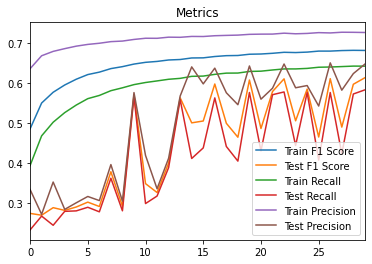

#LOAD and Test the saved model

In [0]:
from keras.models import load_model
def test_model(path):
  saved_model = load_model(path, compile=False)
  saved_model.compile(optimizer=adamax, loss='categorical_crossentropy', metrics=['acc', recall, precision, f1score])
  metrics = saved_model.evaluate(x = x_test_final, y = y_test_np)
  return metrics

In [29]:

model_path = '/content/drive/My Drive/NLP/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset-master/11043771dconv_cal.h5'
metrics = test_model(model_path)
print('Test Loss:\t', metrics[0], '\nTest Accuracy:\t', metrics[1], '\nTest Precision:\t', metrics[2], 
        '\nTest Recall:\t', metrics[3], '\nTest F-Measure:\t', metrics[4])

46818/46818 [==============================] - 15s 324us/step
Test Loss:	 1.0180667709360118 
Test Accuracy:	 0.6237771797172028 
Test Precision:	 0.5823187662864711 
Test Recall:	 0.6464783394829141 
Test F-Measure:	 0.6121659892001264


-------
Gaussian Naive Bayse Comparison 

In [0]:
from sklearn.naive_bayes import CategoricalNB, BernoulliNB


In [0]:
bnb = BernoulliNB()
bnb_model = bnb.fit(x_train_np, y_train)

In [0]:
bnb_model.score(x_test_np, y_test)

0.5920586099363493

In [0]:
bnb_model.score(x_train_np, y_train)

0.6107449515754014

In [0]:
y_test_pred = bnb_model.predict(x_test_np)

In [0]:
np.unique(y_test_pred)

array([0, 1, 2, 3, 4])